In [20]:
#Importar librerías y cargar base de datos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("incident_event_log.csv")

In [21]:
# Resumen general de la base
# filas, columnas
print("Dimensiones del dataset:", df.shape)   

# Info básica
print(f"Filas totales: {len(df):,} | Columnas: {len(df.columns)}")


print("\nTipos de datos:")
# conteo de tipos de columnas
print(df.dtypes.value_counts())               

print("\nPrimeras 3 filas:")
display(df.head(3))

Dimensiones del dataset: (141712, 36)
Filas totales: 141,712 | Columnas: 36

Tipos de datos:
object    29
bool       4
int64      3
Name: count, dtype: int64

Primeras 3 filas:


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00


In [22]:
#Reemplazar "?" por NaN
df=df.replace("?",np.nan)

# Total de filas
total_filas = len(df)

# Conteo de vacíos
faltantes = df.isna().sum()

# Porcentaje de vacíos
porcentaje_faltantes = (faltantes / total_filas) * 100

# DataFrame resumen
faltantes_df = pd.DataFrame({
    "Valores_faltantes": faltantes,
    "Porcentaje_faltantes": porcentaje_faltantes.round(2)
})

print(faltantes_df)

# --- Análisis de duplicados ---

# Número total de filas duplicadas
total_duplicados = df.duplicated().sum()
print(f"Total de filas duplicadas: {total_duplicados}")

# Mostrar las filas duplicadas (si existen)
if total_duplicados > 0:
    print("\n=== Filas duplicadas ===")
    display(df[df.duplicated(keep=False)])  # keep=False muestra todas las ocurrencias
else:
    print("\nNo se encontraron filas duplicadas.")

   

                         Valores_faltantes  Porcentaje_faltantes
number                                   0                  0.00
incident_state                           0                  0.00
active                                   0                  0.00
reassignment_count                       0                  0.00
reopen_count                             0                  0.00
sys_mod_count                            0                  0.00
made_sla                                 0                  0.00
caller_id                               29                  0.02
opened_by                             4835                  3.41
opened_at                                0                  0.00
sys_created_by                       53076                 37.45
sys_created_at                       53076                 37.45
sys_updated_by                           0                  0.00
sys_updated_at                           0                  0.00
contact_type             

In [23]:
# --- Identificación de tipos de variables ---

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object','category']).columns

print("=== Variables numéricas detectadas ===")
print(list(numeric_cols))

print("\n=== Variables categóricas detectadas ===")
print(list(categorical_cols))

# --- Estadísticas para numéricas ---
if len(numeric_cols) > 0:
    print("\n=== Estadísticas descriptivas (numéricas) ===")
    display(df[numeric_cols].describe().T)
else:
    print("\nNo se encontraron variables numéricas.")

=== Variables numéricas detectadas ===
['reassignment_count', 'reopen_count', 'sys_mod_count']

=== Variables categóricas detectadas ===
['number', 'incident_state', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'notify', 'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at']

=== Estadísticas descriptivas (numéricas) ===


,count,mean,std,min,25%,50%,75%,max
reassignment_count,141712.0,1.104197,1.734673,0.0,0.0,1.0,1.0,27.0
reopen_count,141712.0,0.021918,0.207302,0.0,0.0,0.0,0.0,8.0
sys_mod_count,141712.0,5.080946,7.680652,0.0,1.0,3.0,6.0,129.0



=== Análisis univariado de: impact ===


,Frecuencia absoluta,Frecuencia relativa (%)
impact,,
2 - Medium,134335,94.79
3 - Low,3886,2.74
1 - High,3491,2.46


Moda de impact: 2 - Medium


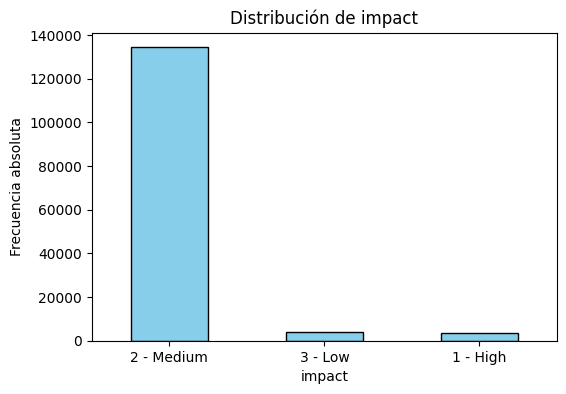


=== Análisis univariado de: urgency ===


,Frecuencia absoluta,Frecuencia relativa (%)
urgency,,
2 - Medium,134094,94.62
1 - High,4020,2.84
3 - Low,3598,2.54


Moda de urgency: 2 - Medium


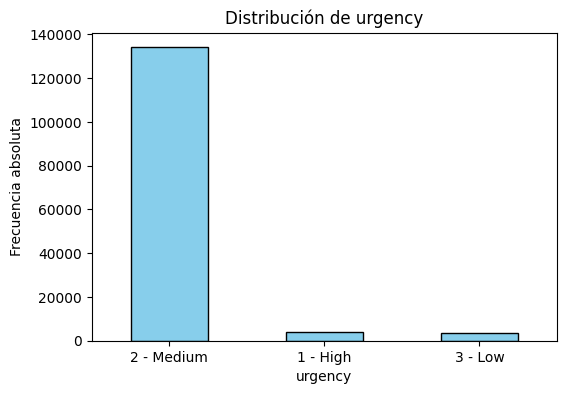


=== Análisis univariado de: priority ===


,Frecuencia absoluta,Frecuencia relativa (%)
priority,,
3 - Moderate,132452,93.47
4 - Low,4030,2.84
2 - High,2972,2.10
1 - Critical,2258,1.59


Moda de priority: 3 - Moderate


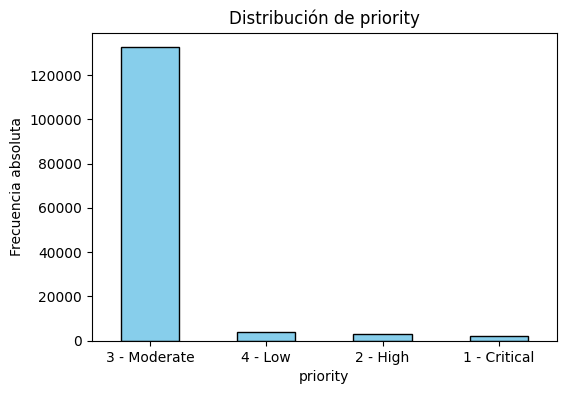

In [ ]:
# Variables de interés
vars_categoricas = ["impact", "urgency", "priority"]

for col in vars_categoricas:
    print(f"\n=== Análisis univariado de: {col} ===")
    
    # Frecuencias absoluta y relativa
    frec_abs = df[col].value_counts(dropna=False)
    frec_rel = df[col].value_counts(normalize=True, dropna=False) * 100
    
    # Tabla combinada
    tabla = pd.DataFrame({
        "Frecuencia absoluta": frec_abs,
        "Frecuencia relativa (%)": frec_rel.round(2)
    })
    
    display(tabla)
    
    # Moda (con control de error)
    moda = df[col].mode()
    if not moda.empty:
        print(f"Moda de {col}: {moda.iloc[0]}")
    else:
        print(f"Moda de {col}: no se pudo calcular (columna vacía o solo con NaN)")
    
    # Gráfico de barras
    if not frec_abs.empty:
        plt.figure(figsize=(6,4))
        frec_abs.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia absoluta")
        plt.xticks(rotation=0)
        plt.show()
    else:
        print(f"No se generó gráfico para {col} (columna vacía).")
